In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [5]:
df = pd.read_csv("heart-1.csv",skipinitialspace=True)

In [6]:
df.head()  #first 5 values

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.shape  # size of the data

(303, 14)

In [8]:
df.target.value_counts()

#provides count of all unique values in a variable

1    165
0    138
Name: target, dtype: int64

In [9]:
df.target.value_counts(normalize= True)*100 # provides percentage of share that each unique value shares within a variable

1    54.455446
0    45.544554
Name: target, dtype: float64

In [10]:
df.isna().sum()  #sum of all null values in a variable

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.duplicated().sum() #sum of all duplicated rows

1

In [12]:
df.drop_duplicates(inplace = True) #drop duplicates

In [13]:
df.dtypes #data type of each column

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [14]:
df.info() #information about data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


Text(0.5, 1.0, 'age distribution')

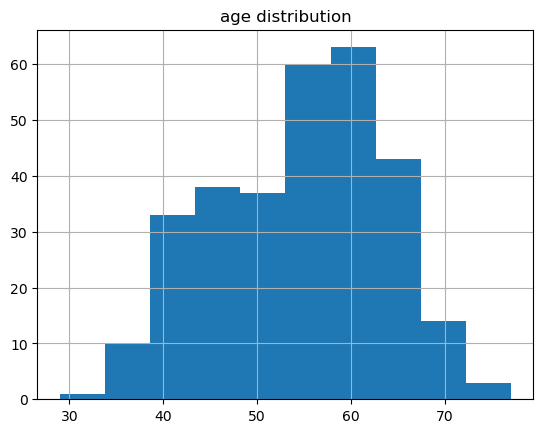

In [15]:
df['age'].hist(bins = 10,grid = True)
plt.title("age distribution")

we can analyse the age distribution and infer that there are more than 60% of people lying b/w the age group 57- 62

C:\Users\gandh\AppData\Local\Temp\ipykernel_18720\1015890273.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==1]['age'],label = 'female')
C:\Users\gandh\AppData\Local\Temp\ipykernel_18720\1015890273.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==0]['age'],labe

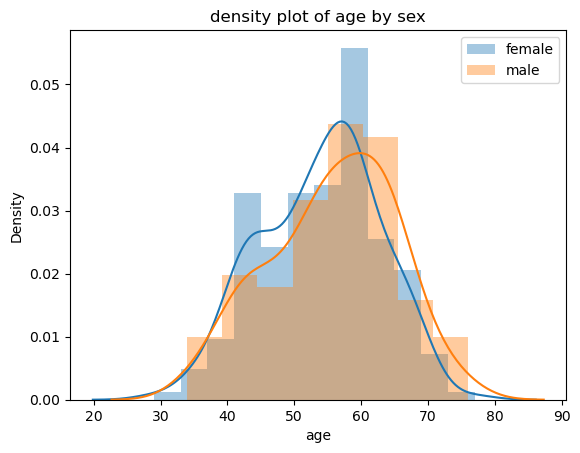

In [16]:
sns.distplot(df[df['sex']==1]['age'],label = 'female')
sns.distplot(df[df['sex']==0]['age'],label = 'male')
plt.legend()
plt.title("density plot of age by sex")
plt.show()

C:\Users\gandh\AppData\Local\Temp\ipykernel_18720\3445944774.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target']==1]['age'],label = 'heart attack yes')
C:\Users\gandh\AppData\Local\Temp\ipykernel_18720\3445944774.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target']

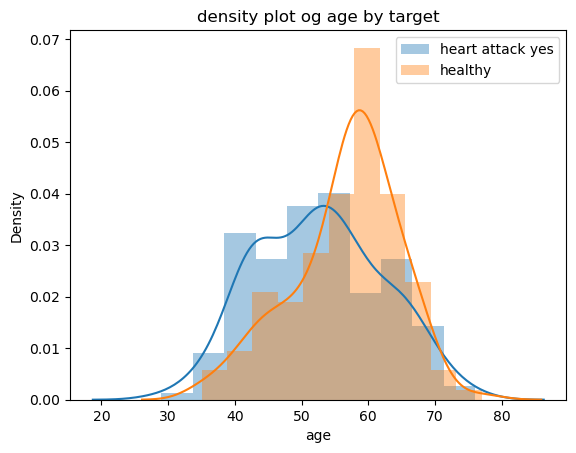

In [17]:
sns.distplot(df[df['target']==1]['age'],label = 'heart attack yes')
sns.distplot(df[df['target']==0]['age'],label = 'healthy')
plt.legend()
plt.title("density plot og age by target")
plt.show()

density graphs shows the smoothed distrbution of points Along the numerical axis. the density peaks 
where the data points are in highest concentration. density graphs can be considered as smoothed histograms.

Text(0.5, 1.0, 'resting blood pressure distribution')

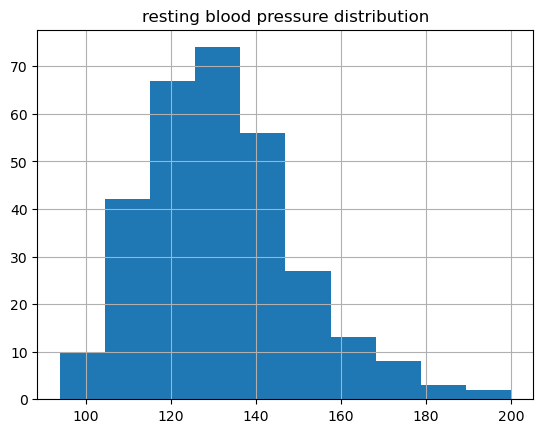

In [18]:
df['trestbps'].hist()
plt.title("resting blood pressure distribution")

C:\Users\gandh\AppData\Local\Temp\ipykernel_18720\2137859046.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["trestbps"],bins=10)


Text(0.5, 1.0, 'resting blood pressure density plot')

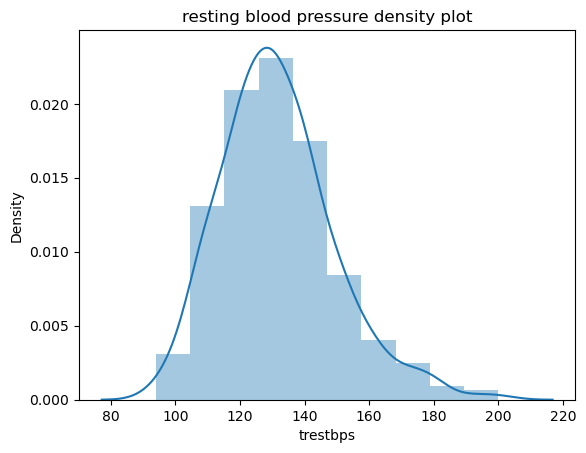

In [19]:
sns.distplot(df["trestbps"],bins=10)
plt.title("resting blood pressure density plot")

C:\Users\gandh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\gandh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: xlabel='oldpeak'>

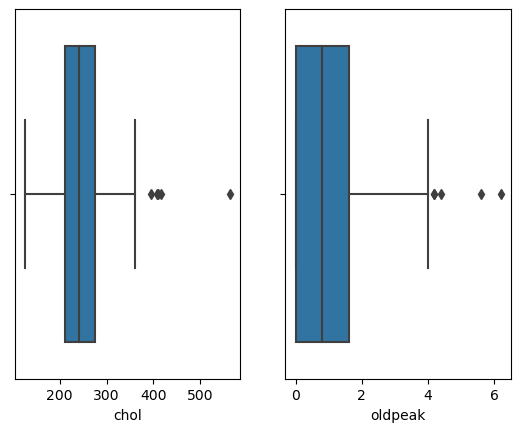

In [20]:
fig,axes = plt.subplots(nrows = 1,ncols = 2)
sns.boxplot(x = 'chol',data = df,orient = 'v',ax = axes[0])
sns.boxplot(x='oldpeak',data = df,orient = 'v',ax = axes[1])

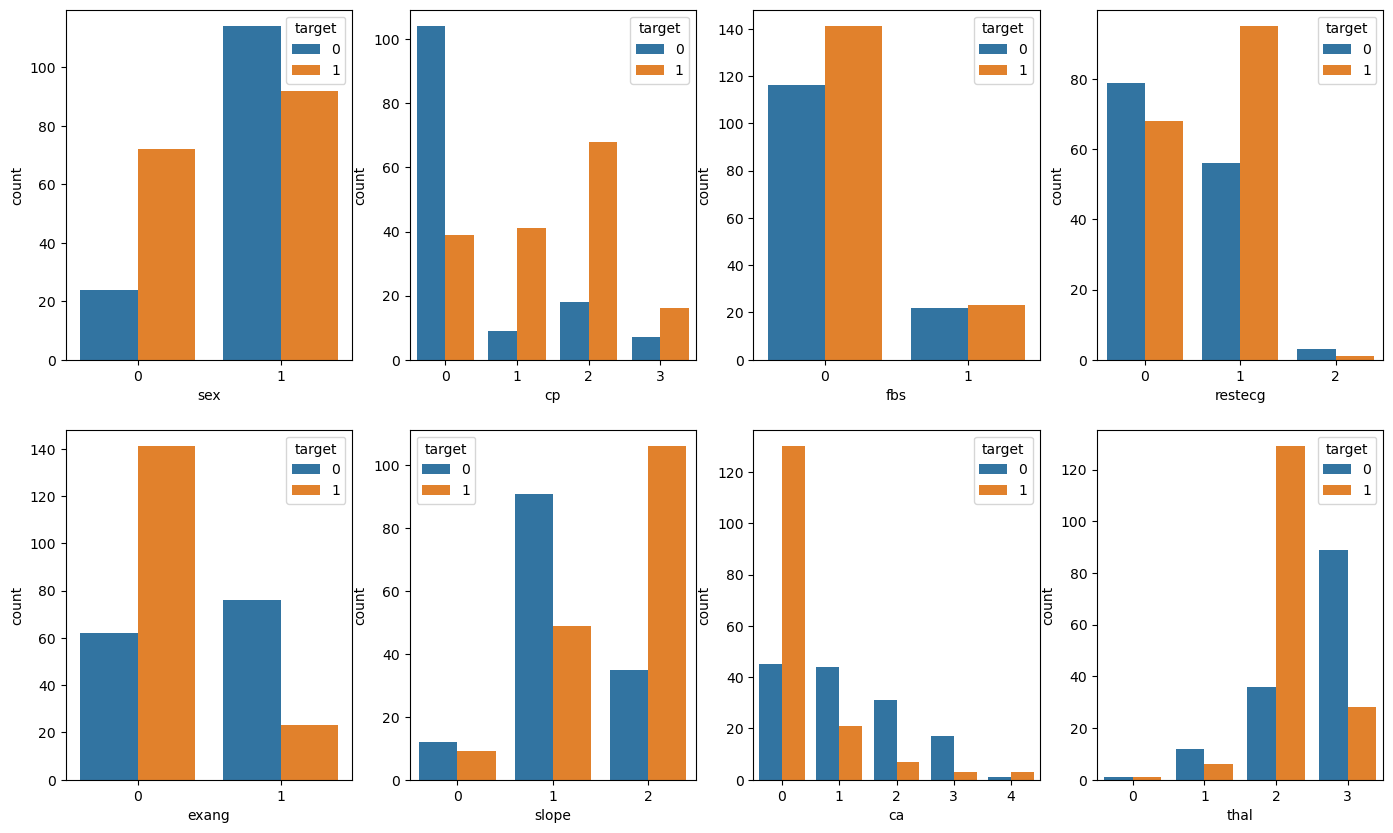

In [21]:
fig,axes = plt.subplots(nrows = 2,ncols = 4,figsize=(17,10))

cat_feat = ['sex','cp','fbs','restecg','exang','slope','ca','thal','target']
for idx,feature in enumerate(cat_feat):
    if feature!= 'target':
        ax = axes[int(idx/4),idx%4]
        # ax = axes[1,2]
        
        sns.countplot(x = feature,hue = 'target',data = df,ax = ax)

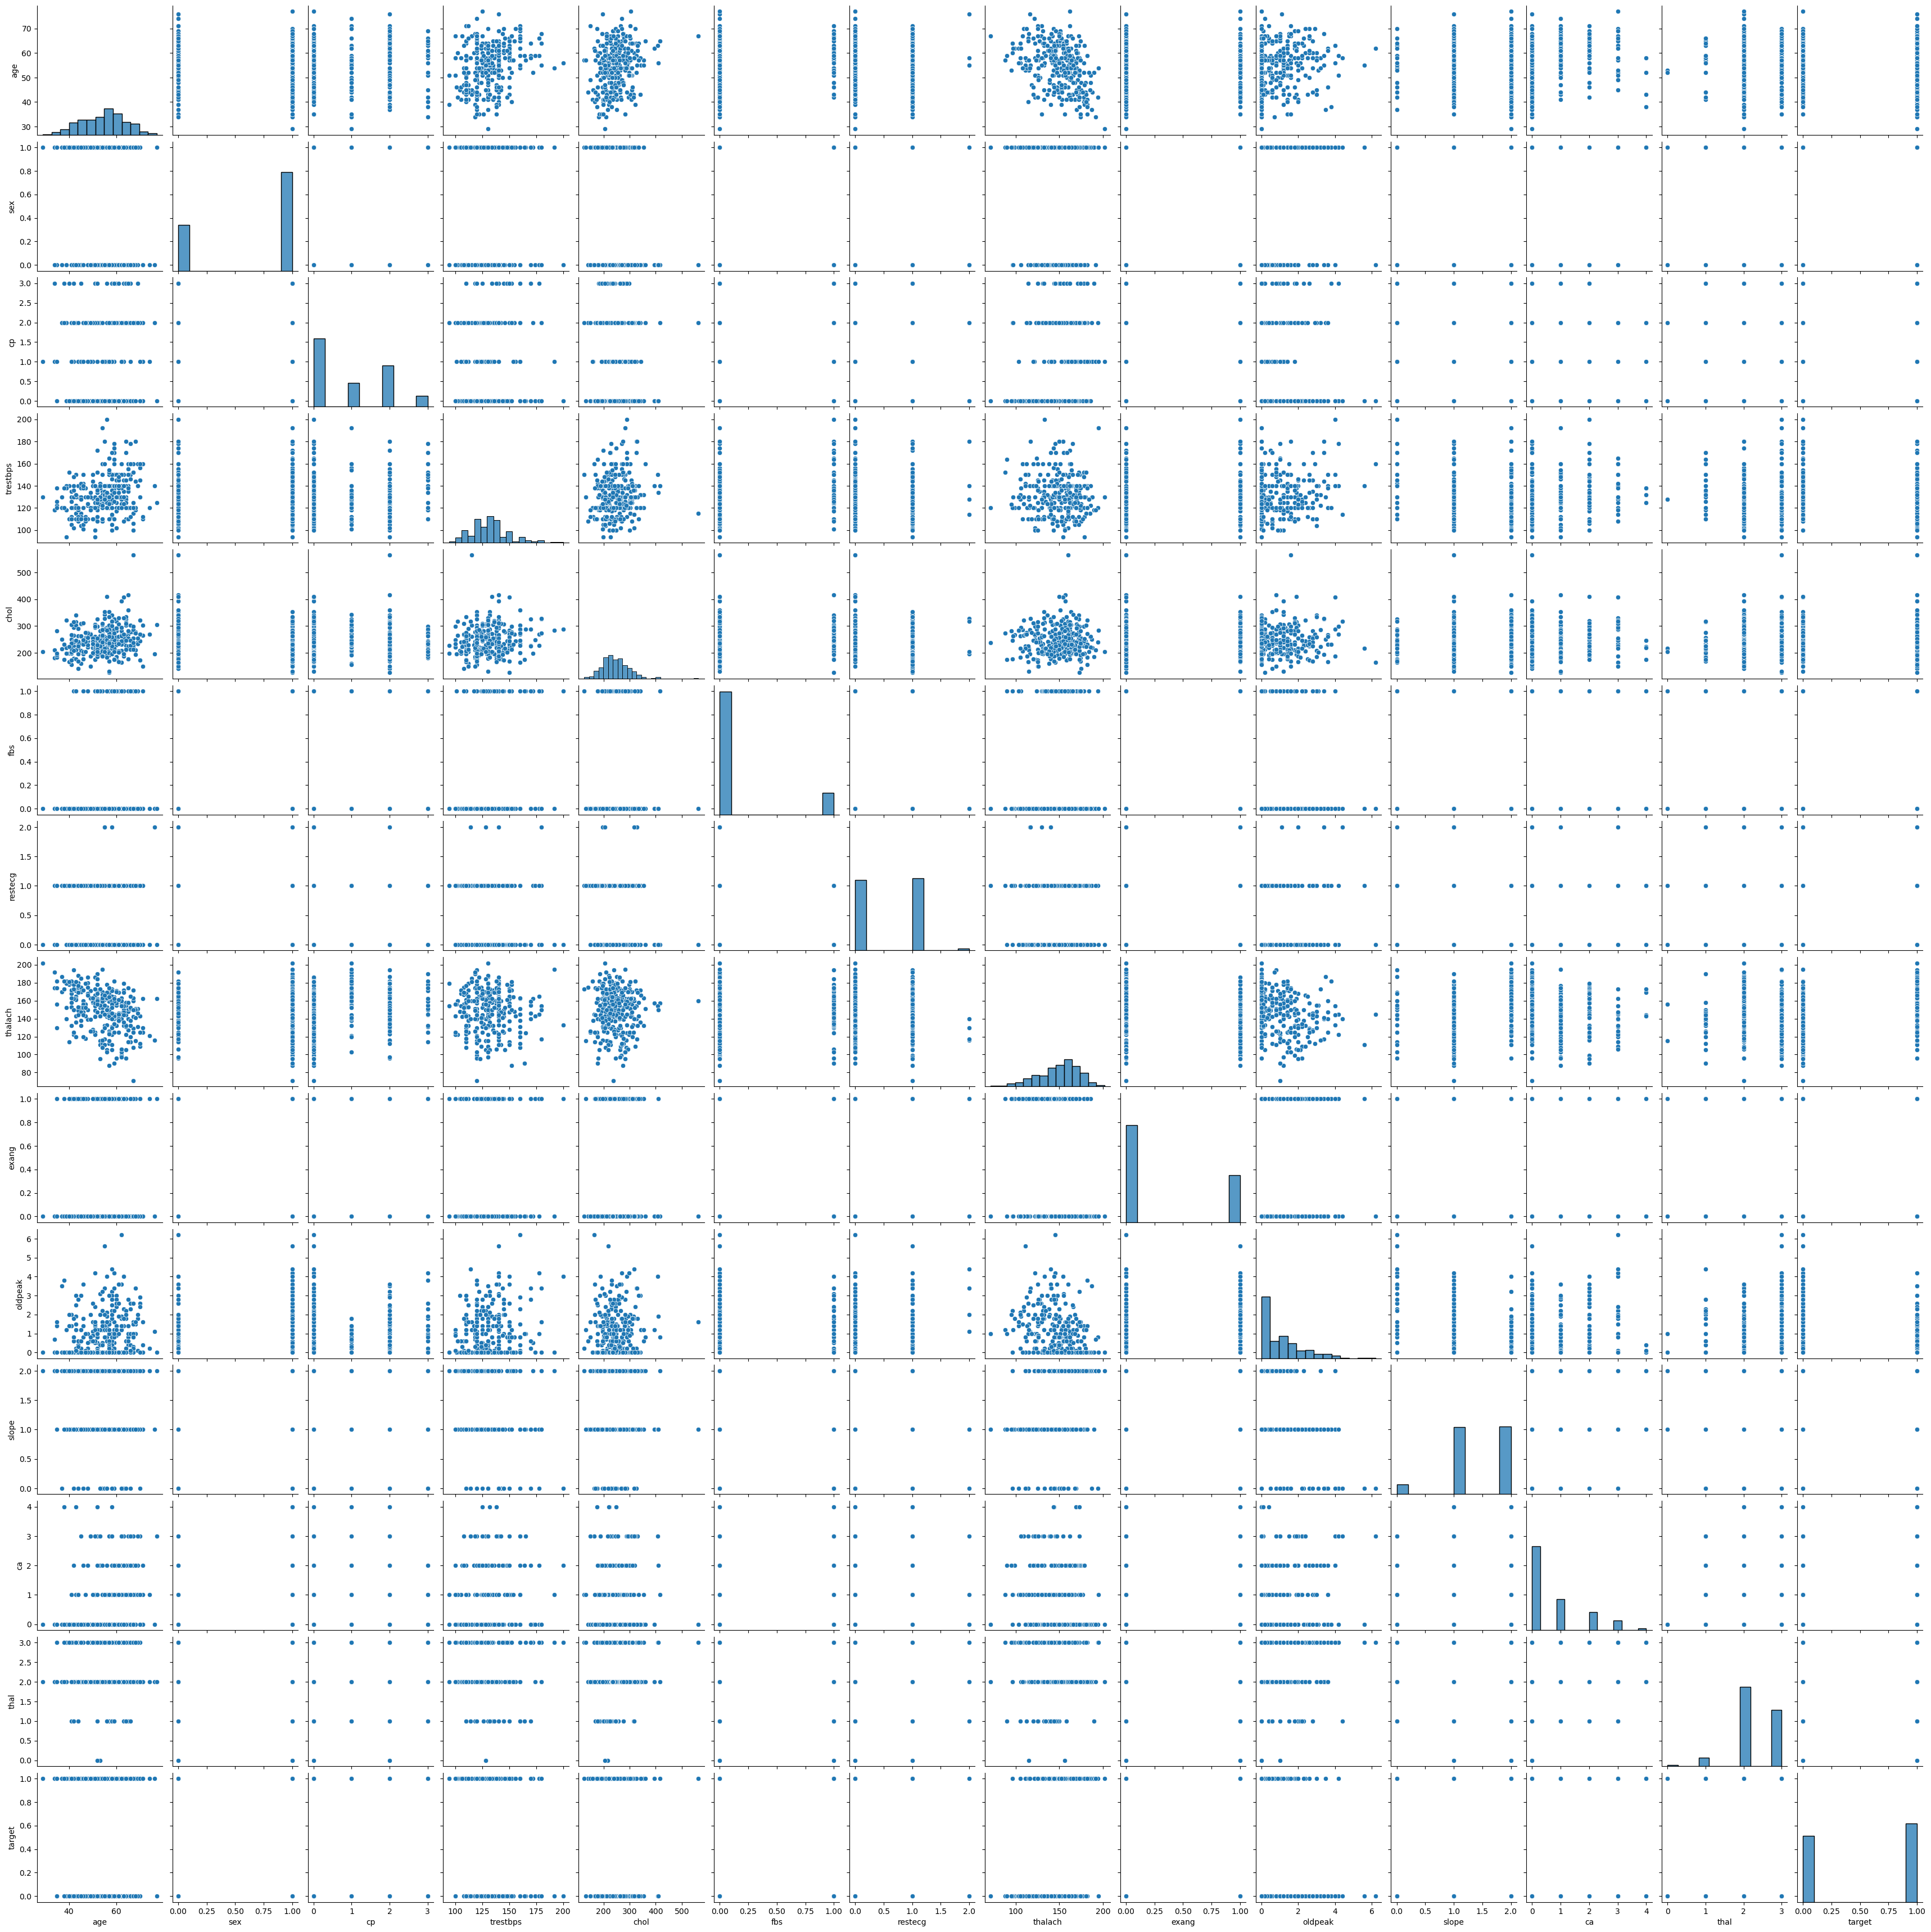

In [22]:
sns.pairplot(df)

<Axes: >

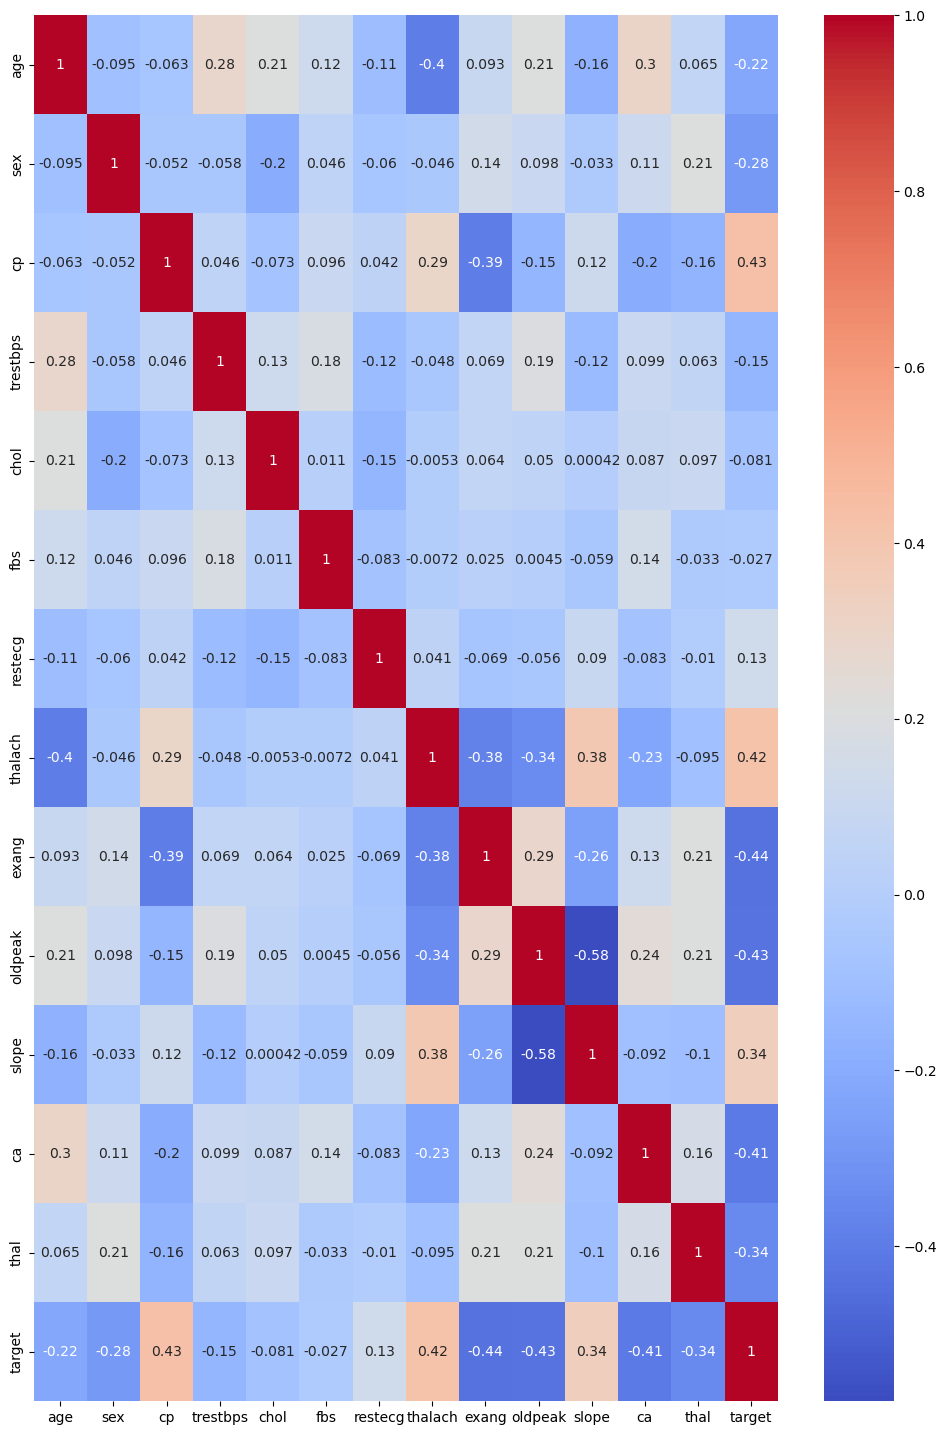

In [23]:
plt.figure(figsize=(12,18))
sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm')

Text(0.5, 1.0, 'cholestrol vs blood pressure in rest')

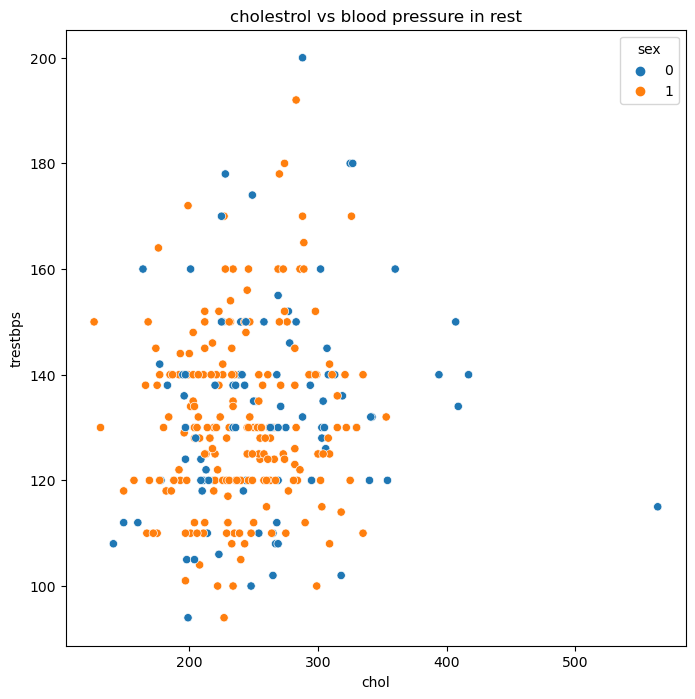

In [24]:
plt.rcParams['figure.figsize']= (8,8)
sns.scatterplot(x = 'chol',y ='trestbps',hue= 'sex',size = None,data = df)
plt.title("cholestrol vs blood pressure in rest")

In [25]:
x = df.drop(columns = 'target') #independent variables
y = df['target'] # dependent variable

print(x.shape)
print(y.shape)

(302, 13)
(302,)


In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state= 0)
print(x_train.shape)
print(x_test.shape)

(211, 13)
(91, 13)


In [27]:
elf = tree.DecisionTreeClassifier()
elf.fit(x_train,y_train)
y_train_pred = elf.predict(x_train)

y_test_pred = elf.predict(x_test)

In [28]:
len(y_train_pred)

211

In [29]:
len(y_test_pred)

91

In [30]:
#helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom}confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot = True,cmap = 'Blues',fmt = 'g') #for g and G, the maximum number of significant digits
    plt.tight_layout()
    plt.show()

In [31]:
print(f'train score {accuracy_score(y_train_pred,y_train)}')
print(f'test score {accuracy_score(y_test_pred,y_test)}')

train score 1.0
test score 0.7142857142857143


train dataconfusion matrix


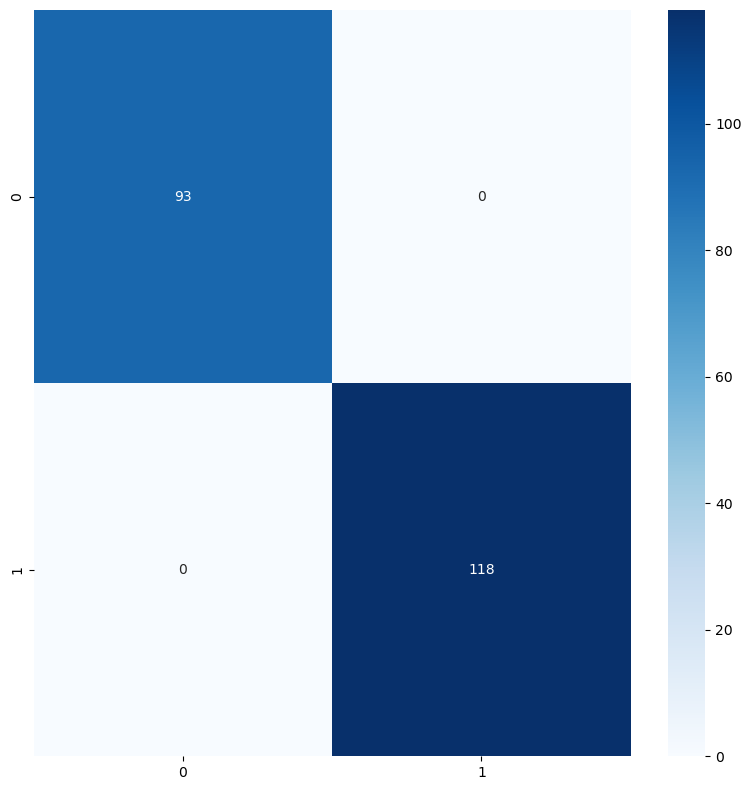

In [32]:
plot_confusionmatrix(y_train_pred,y_train,dom = 'train data')